<a href="https://colab.research.google.com/github/asunar2/412Q5/blob/main/Q2_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import matplotlib.pyplot as plt 
import numpy as np 
import gzip

In [28]:

"""
@authors: Jian Kang
@date: 11/15/2020
"""
import gzip
import numpy as np


class DataLoader(object):
    """
    class to load MNIST data
    """
    def __init__(self, Xtrainpath, Ytrainpath, Xtestpath, Ytestpath):
        self.Xtrainpath = Xtrainpath
        self.Ytrainpath = Ytrainpath
        self.Xtestpath = Xtestpath
        self.Ytestpath = Ytestpath

    @staticmethod
    def get_images(f):
        with gzip.GzipFile(fileobj=f) as bytefile:
            magic = np.frombuffer(bytefile.read(4), dtype=np.dtype(np.uint32).newbyteorder('>'))[0]
            if magic != 2051:
                raise ValueError('Invalid magic number {} for file {}.'.format(magic, f.name))
            params = list()
            for _ in range(3):
                params.append(np.frombuffer(bytefile.read(4), dtype=np.dtype(np.uint32).newbyteorder('>'))[0])
            buffer = bytefile.read(params[0] * params[1] * params[2])
            images = np.frombuffer(buffer, dtype=np.uint8)
            return images.reshape(params[0], params[1], params[2])

    @staticmethod
    def get_labels(f):
        with gzip.GzipFile(fileobj=f) as bytefile:
            magic = np.frombuffer(bytefile.read(4), dtype=np.dtype(np.uint32).newbyteorder('>'))[0]
            if magic != 2049:
                raise ValueError('Invalid magic number {} for file {}.'.format(magic, f.name))
            param = np.frombuffer(bytefile.read(4), dtype=np.dtype(np.uint32).newbyteorder('>'))[0]
            buffer = bytefile.read(param)
            labels = np.frombuffer(buffer, dtype=np.uint8)
            return labels

    def load_data(self):
        with open(self.Xtrainpath, 'rb') as f:
            Xtrain = self.get_images(f)
        with open(self.Ytrainpath, 'rb') as f:
            Ytrain = self.get_labels(f)
        with open(self.Xtestpath, 'rb') as f:
            Xtest = self.get_images(f)
        with open(self.Ytestpath, 'rb') as f:
            Ytest = self.get_labels(f)
        return Xtrain, Ytrain, Xtest, Ytest



#imple Tutorial on Loading MNIST Dataset
#If you put downloaded .gz files into a folder named 'data', then you can load the data using the code below:

dataloader = DataLoader(Xtrainpath='data/train-images-idx3-ubyte.gz',
                        Ytrainpath='data/train-labels-idx1-ubyte.gz',
                        Xtestpath='data/t10k-images-idx3-ubyte.gz',
                        Ytestpath='data/t10k-labels-idx1-ubyte.gz')
Xtrain, Ytrain, Xtest, Ytest = dataloader.load_data()

#The shape of each variable will be as follows:
Xtrain: (60000, 28, 28)
Ytrain: (60000,)
Xtest: (10000, 28, 28)
Ytest: (10000,)



In [29]:
#question 2

#first step, data prep
import math
from scipy import spatial
import copy

X_train, Y_train, X_test, Y_test = dataloader.load_data()


X_train = X_train.reshape(len(X_train),784)
X_train = X_train/255

X_test = X_test.reshape(len(X_test),784)
X_test = X_test/255


In [31]:
#create KDTree to be queried later

from sklearn.neighbors import KDTree
tree = spatial.KDTree(X_train)
print(tree.data)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
import numpy as np
from scipy import stats


"""function to query tree to find the nearest neighbors for Xtest vector
    p_val = 1 for manhattan 2 for euclid"""

def k_nearest(vec, p_val):
  
    dist, labels = tree.query(vec, k=9, p=p_val)
    return labels

"""function to identify predictions for Xtest labels based on mode of k nearest neighbors
    p_v = 1 for manhattan 2 for euclid"""

def predict(test, p_v):

      #initialize prediction vector to be length of letters in X (10,000)
      pred_Y = np.zeros((X_test.shape[0],1))
      k_vals = [1, 3, 5, 7, 9]
      pred_labels = {} #dictionary of arrays representing the label predicted for each k value

      #initialize dictionary that will be used to store arrays of predicted labels for each k value
      for k in k_vals:
        arr= []
        arr = [0 for i in range(len(test))]
        pred_labels[k] = arr
    
      #go through every vector in Xtest, find k nearest neighbors, find mode of labels of those k neighbors, set prediction to this value
      for i in range(len(test)):
        labels = k_nearest(test[i], p_v)
        print(i)

        for k in k_vals:
          arr = []
          count = 0

          for j in labels:
            arr.append(Y_train[j])
            count += 1
            if (count == k):
              break

          pred = stats.mode(arr)
          pred_labels[k][i] = pred[0][0]
      print(pred_labels)
      
      return pred_labels

"""function to calculate prediction accuracy, identify percentage of incorrect labels and subtract from 100"""
def accuracy_cal(pred):

    k_vals = [1, 3, 5, 7, 9]
    k_accuracy = {}

    for k in k_vals:
      count = 0
      for i in range(len(Y_test)):
        if (pred[k][i] != Y_test[i]):
          count += 1

      similarity = 100 - (count/len(Y_test)*100)
      k_accuracy[k] = similarity
    return k_accuracy



 

Streaming output truncated to the last 5000 lines.
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192

<function matplotlib.pyplot.show(close=None, block=None)>

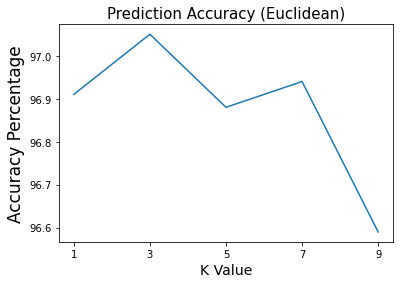

In [33]:
prediction_euc = predict(X_test, 2)
k_acc_euc = accuracy_cal(prediction_euc)

import matplotlib.pyplot as plt
X = k_acc_euc.keys
X = []
X = [k for k in k_acc_euc]
Y = []
Y = [0 for k in k_acc_euc]
ind = 0
for i in k_acc_euc:
  Y[ind] = k_acc_euc[i]
  ind+=1

print(X)
print(Y)
plt.title("Prediction Accuracy (Euclidean)",fontsize = 15)
plt.xlabel("K Value", fontsize = 14)
plt.ylabel("Accuracy Percentage", fontsize = 17)
plt.plot(X,Y)
plt.xticks([1, 3, 5, 7, 9])
plt.show

Streaming output truncated to the last 5000 lines.
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192

<function matplotlib.pyplot.show(close=None, block=None)>

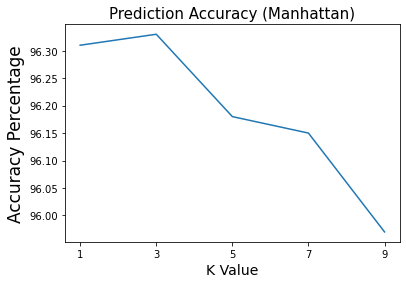

In [34]:
prediction_man = predict(X_test, 1)
k_acc_man = accuracy_cal(prediction_man)

import matplotlib.pyplot as plt
X = k_acc_man.keys
X = []
X = [k for k in k_acc_euc]
Y = []
Y = [0 for k in k_acc_euc]
ind = 0
for i in k_acc_man:
  Y[ind] = k_acc_man[i]
  ind+=1

print(X)
print(Y)
plt.plot(X,Y)
plt.title("Prediction Accuracy (Manhattan)",fontsize = 15)
plt.xlabel("K Value", fontsize = 14)
plt.ylabel("Accuracy Percentage", fontsize = 17)
plt.xticks([1, 3, 5, 7, 9])

plt.show

